In [7]:
import cv2
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog

In [8]:
image_paths = glob.glob(os.path.join("gambar_lira/", '*', '*'))
images = []

for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        images.append((img_path, img))

In [9]:
def extract_rgb_histograms(images, bins=32):

    data = []
    for img_path, img in images:

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        hist_r = cv2.calcHist([img_rgb], [0], None, [bins], [0, 256]).flatten()
        hist_g = cv2.calcHist([img_rgb], [1], None, [bins], [0, 256]).flatten()
        hist_b = cv2.calcHist([img_rgb], [2], None, [bins], [0, 256]).flatten()
        
        hist = np.concatenate([hist_r, hist_g, hist_b])
        hist = hist / hist.sum()
        
        pecahan = os.path.normpath(img_path).split(os.sep)[-2]
        data.append({'pecahan': pecahan, 'histogram': hist})
    return pd.DataFrame(data)

df_hist = extract_rgb_histograms(images)
print(df_hist.head(10))

  pecahan                                          histogram
0      10  [0.0, 3.616898e-07, 1.4467592e-05, 9.367766e-0...
1      10  [0.0, 0.0, 3.1467014e-05, 0.00013925058, 0.000...
2      10  [0.0055700233, 0.0010109231, 0.00035481772, 0....
3      10  [0.00067997683, 0.000113570604, 0.0002629485, ...
4      10  [0.0, 0.0, 7.233796e-07, 6.618923e-05, 0.00030...
5     100  [1.3744213e-05, 6.9806134e-05, 0.00022280093, ...
6     100  [0.0, 0.0, 3.616898e-06, 0.00012188947, 0.0009...
7     100  [3.942419e-05, 0.00011429398, 0.0006000434, 0....
8     100  [0.0, 4.7019676e-06, 3.761574e-05, 0.000943648...
9     100  [0.0, 3.616898e-07, 3.616898e-06, 7.5954863e-0...


In [10]:
def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    data = []
    for img_path, img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hog_feat = hog(
            gray,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            block_norm='L2-Hys',
            feature_vector=True
        )
        pecahan = os.path.normpath(img_path).split(os.sep)[-2]
        data.append({'pecahan': pecahan, 'hog_feature': hog_feat})
    return pd.DataFrame(data)

df_hog = extract_hog_features(images)
print(df_hog.head(10))

  pecahan                                        hog_feature
0      10  [0.0, 0.0, 0.0, 0.0, 0.18588140606915524, 0.0,...
1      10  [0.2579387236113657, 0.018412665039998666, 0.0...
2      10  [0.17911126192024948, 0.0, 0.0, 0.0, 0.3652618...
3      10  [0.02026720883482685, 0.0069268108175900844, 0...
4      10  [0.28987532654383535, 0.027259249883322192, 0....
5     100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6     100  [0.37123709337865296, 0.0, 0.21000340933076794...
7     100  [0.3292397053892115, 0.0, 0.16721226795677355,...
8     100  [0.3625362679466594, 0.0, 0.1768995779648993, ...
9     100  [0.42784442020711133, 0.0, 0.0, 0.0, 0.4278444...


In [11]:
df_hist.to_csv("fitur_histogram.csv", index=False)
df_hog.to_csv("fitur_hog.csv", index=False)

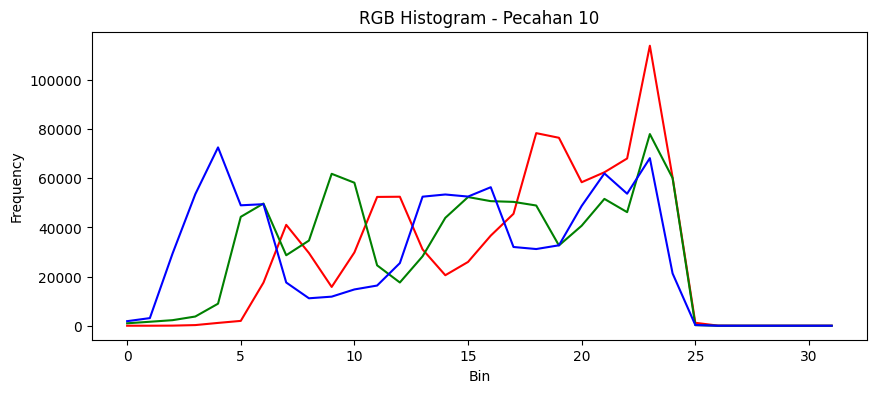

In [12]:
sample_img = images[0][1]
sample_path = images[0][0]
pecahan = os.path.normpath(sample_path).split(os.sep)[-2]

# Histogram RGB
img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,4))
for i, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img_rgb], [i], None, [32], [0,256])
    plt.plot(hist, color=color)
plt.title(f'RGB Histogram - Pecahan {pecahan}')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.show()



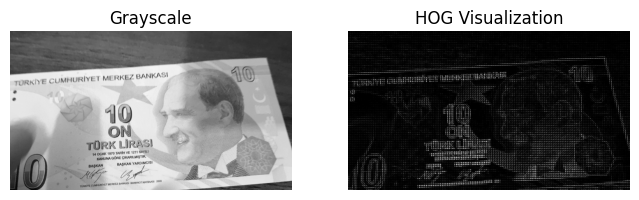

In [13]:
# Visualisasi HOG
from skimage import exposure
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
hog_feat, hog_image = hog(
    gray, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),
    block_norm='L2-Hys', visualize=True, feature_vector=True
)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
plt.show()